<a href="https://colab.research.google.com/github/StephDL-utp/modelos_predictivos/blob/main/Proyecto_Final_SDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importar librerías y dataset**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.impute import SimpleImputer

#Regresión Logística
from sklearn.model_selection import train_test_split #Divide datos en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Estandariza variables
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay #Evalúa presición del modelo

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Leer el archivo CSV
df = pd.read_csv('diabetes_dataset.csv')

# **2. Información General**

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.shape

(768, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
missing_data = df.isnull().sum()
print(missing_data)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


En la verificación general de los datos se detectó que hay variables con valor 0, lo cual es clínicamente imposible para niveles de glucosa, BMI, presión arterial, insulina y grosor de la piel.

In [27]:
# Identificar las celdas que contienen 0
zero_values = (df == 0)

# Mostrar las posiciones de los valores 0 (True significa que el valor es 0)
print(zero_values)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False     True  False   
1          False    False          False          False     True  False   
2          False    False          False           True     True  False   
3          False    False          False          False    False  False   
4           True    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False     True  False   
765        False    False          False          False    False  False   
766        False    False          False           True     True  False   
767        False    False          False          False     True  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [28]:
# Filtrar las filas que contienen valores 0 en las columnas especificadas
filtered_df = df[(df['Glucose'] == 0) |
                 (df['BloodPressure'] == 0) |
                 (df['SkinThickness'] == 0) |
                 (df['Insulin'] == 0) |
                 (df['BMI'] == 0)]

# Contar cuántas filas se están filtrando (con valores 0 en las columnas especificadas)
filtered_rows_count = filtered_df.shape[0]

# Imprimir la cantidad de filas filtradas
print(f"Filas con valores 0 en alguna de las columnas especificadas: {filtered_rows_count}")

# Ver las primeras filas del DataFrame filtrado
filtered_df.head()

Filas con valores 0 en alguna de las columnas especificadas: 376


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0


In [29]:
# Filtrar las filas donde las columnas no tengan valor 0
df_cleaned = df[(df['Glucose'] != 0) &
                (df['BloodPressure'] != 0) &
                (df['SkinThickness'] != 0) &
                (df['Insulin'] != 0) &
                (df['BMI'] != 0)]

# Ver las primeras filas del DataFrame limpio
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [30]:
# Ver cuántas filas había antes de la limpieza
print(f"Filas originales: {df.shape[0]}")

# Ver cuántas filas hay después de la limpieza
print(f"Filas después de excluir las filas con 0: {df_cleaned.shape[0]}")


Filas originales: 768
Filas después de excluir las filas con 0: 392


Como el 51% de la data contiene valores 0, filtrar esos datos no es recomendable porque la muestra se reduce signigicativamente, por lo cual se procese a utilizar técnicas de imputación de valores.

**Imputar valores 0 con la mediana**

In [31]:
# 1. Columnas donde los 0 no son válidos (ej: glucosa no puede ser 0)
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 2. Reemplazar 0 por NaN (para que SimpleImputer los detecte)
df[columns_to_impute] = df[columns_to_impute].replace(0, float('nan'))

# 3. Imputar NaN con la mediana
imputer = SimpleImputer(strategy='median')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# 4. Verificar que no queden 0 en las columnas imputadas
print(df[columns_to_impute].describe())  # Estadísticas post-imputación

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


In [32]:
# Identificar las celdas que contienen 0
zero_values = (df == 0)

# Mostrar las posiciones de los valores 0 (True significa que el valor es 0)
print(zero_values)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4           True    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **3. Análisis EDA**

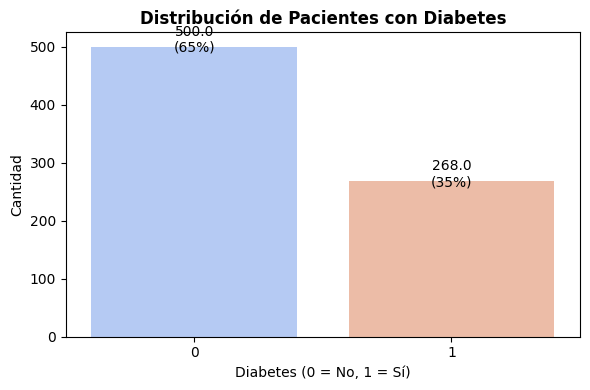

In [34]:
# Gráfica de distribución
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="Outcome", hue="Outcome", palette="coolwarm", legend=False)
plt.title("Distribución de Pacientes con Diabetes", fontweight='bold')
plt.xlabel("Diabetes (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")

# Calcular porcentajes
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height/total)*100:.0f}%'  # Formato: 1 decimal

    # Anotar cantidad y porcentaje
    ax.annotate(
        f'{height}\n({percentage})',  # Texto: "Cantidad (Porcentaje%)"
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='center',
        fontsize=10, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

plt.tight_layout()
plt.show()

El 65% de los registros del dataset provienen de pacientes que no tienen diabetes, mientras que el 35% restante sí presenta la enfermedad.

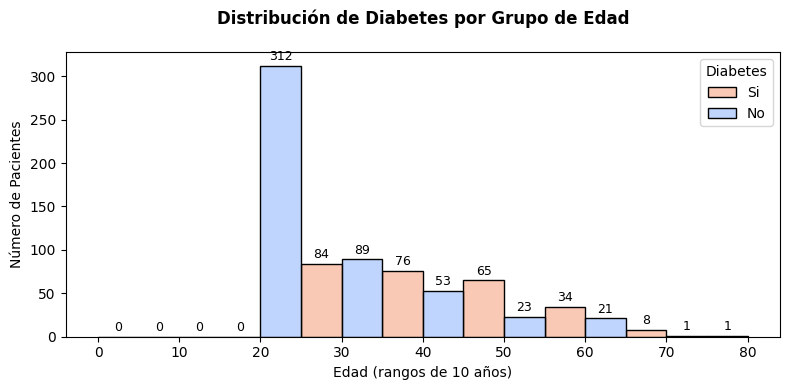

In [35]:
# Distribucion por grupo de edad
plt.figure(figsize=(8, 4))
ax = sns.histplot(
    data=df,
    x="Age",
    hue="Outcome",
    bins=range(0, 90, 10),  # Rangos de 10 años
    multiple="dodge",
    palette="coolwarm",
    hue_order=[0, 1],
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(
        container,
        label_type='edge',
        labels=[f'{int(height)}' for height in container.datavalues],
        padding=2,
        fontsize=9,
        color='black'
    )

plt.title("Distribución de Diabetes por Grupo de Edad", fontweight='bold', pad=20)
plt.xlabel("Edad (rangos de 10 años)", fontsize=10)
plt.ylabel("Número de Pacientes", fontsize=10)

plt.legend(
    title="Diabetes",
    labels=["Si", "No"],
    loc='upper right'
)

plt.tight_layout()
plt.show()

A mayor edad, mayor probabilidad de tener diabetes. Esto coincide con lo que se sabe médicamente: la diabetes tipo 2 es más frecuente en adultos mayores debido a factores como resistencia a la insulina, estilo de vida, etc.
La presencia de la enfermedad es dominante en grupos de edad mayores a 30 años (especialmente 30-50).


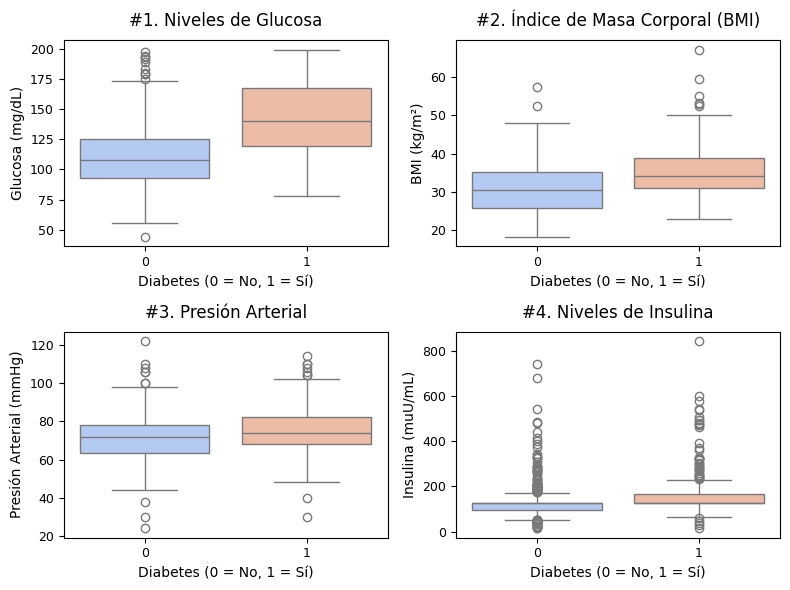

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar la figura con 2 filas y 2 columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))  # 15 de ancho x 10 de alto
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Espacio vertical y horizontal entre gráficos

# Datos para cada subplot
variables = ['Glucose', 'BMI', 'BloodPressure', 'Insulin']
titles = [
    "#1. Niveles de Glucosa",
    "#2. Índice de Masa Corporal (BMI)",
    "#3. Presión Arterial",
    "#4. Niveles de Insulina"
]
ylabels = ["Glucosa (mg/dL)", "BMI (kg/m²)", "Presión Arterial (mmHg)", "Insulina (muU/mL)"]

# Generar los boxplots
for i, (var, title, ylabel) in enumerate(zip(variables, titles, ylabels)):
    # Calcular posición en la matriz 2x2 (fila, columna)
    row, col = i // 2, i % 2
    ax = axes[row, col]

    sns.boxplot(
        x="Outcome",
        y=var,
        data=df,
        hue="Outcome",
        palette="coolwarm",
        legend=False,
        ax=ax
    )
    ax.set_title(title, fontsize=12, pad=10)
    ax.set_xlabel("Diabetes (0 = No, 1 = Sí)", fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)

    # Ajustar ticks para mejor legibilidad
    ax.tick_params(axis='both', labelsize=9)


plt.tight_layout()
plt.show()

Niveles de Glucosa en Sangre:
*  Sin diabetes: Niveles normales (70-110 mg/dL en ayunas).
*  Con diabetes: Niveles más altos (>126 mg/dL en ayunas) y mayor dispersión, indicando niveles extremadamente altos en algunos pacientes.


Índice de Masa Corporal (IMC):
*  Sin diabetes: Mayoría con IMC normal o sobrepeso, pocos casos de obesidad.
*  Con diabetes: IMC más alto, con presencia de obesidad mórbida (IMC >35).

Presión Arterial:
*  Sin diabetes: Presión arterial normal o prehipertensión.
*  Con diabetes: Mayor dispersión hacia hipertensión (≥140/90 mmHg), relacionada con daño en vasos sanguíneos por resistencia a la insulina.

Niveles de Insulina:
*  Sin diabetes: Niveles normales, con baja variabilidad.
*  Con diabetes: Variabilidad en los niveles, con algunos casos de insulina elevada (resistencia) y otros de insulina baja (déficit en producción).

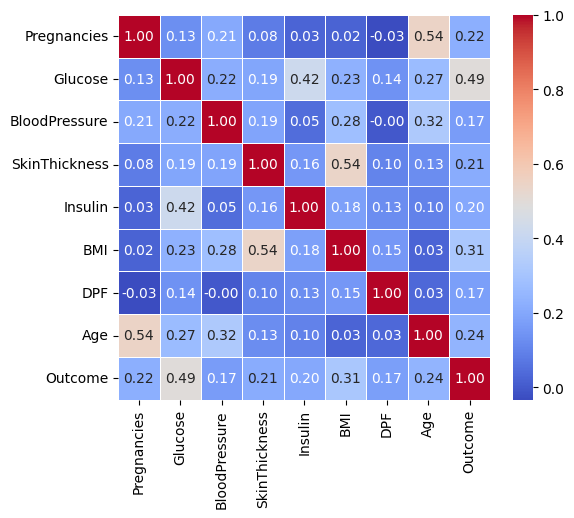

In [37]:
plt.figure(figsize=(6,5))
ax = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


ax.set_xticklabels([label.get_text().replace('DiabetesPedigreeFunction', 'DPF') for label in ax.get_xticklabels()])
ax.set_yticklabels([label.get_text().replace('DiabetesPedigreeFunction', 'DPF') for label in ax.get_yticklabels()])

plt.show()

*   Variables de mayor impacto en Diabetes: glucosa (0.49), IMC (0.31) y edad (0.24).
*   Correlaciones entre variables independientes: embarazados y edad (0.54), IMC y grosor de piel (0.54) y glucosa e insulina (0.42).
*   Variables con baja influencia en Diabetes: Presión arterial (0.17) y DPF (0.17)



# **4. Regresión Logística**

**A. Regresión Logística (Dataset imputado)**

In [47]:
#Separar variables
X = df.drop('Outcome', axis=1)  # Variables predictoras (todas excepto 'Outcome')
y = df['Outcome']               # Variable objetivo (diabetes)

# Dividir en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#Estacalar Variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
# Aumentamos iteraciones para convergencia (el modelo encuentra una solución estable donde los coeficientes ya no cambian significativamente)

y_pred = model.predict(X_test_scaled)  #Predecir sobre el test

print(f"\nPrecisión (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
})
print(coeficientes.sort_values(by='Coeficiente', ascending=False))

#Coeficientes positivos: Aumentan la probabilidad de diabetes.
#Coeficientes negativos: Disminuyen la probabilidad.


Precisión (Accuracy): 0.76

Matriz de Confusión:
 [[133  15]
 [ 41  42]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       148
           1       0.74      0.51      0.60        83

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.76      0.74       231

                   Variable  Coeficiente
1                   Glucose     1.196562
5                       BMI     0.742767
0               Pregnancies     0.409174
6  DiabetesPedigreeFunction     0.233021
7                       Age     0.196053
3             SkinThickness     0.014958
4                   Insulin    -0.155298
2             BloodPressure    -0.217999


**B. Regresión Logística Optimizada (Dataset imputado)**

In [42]:
# 1. Cargar datos y seleccionar variables
X = df.drop(['Outcome', 'SkinThickness', 'Insulin', 'BloodPressure'], axis=1)  # Eliminamos variables poco relevantes
y = df['Outcome']

# 2. Dividir datos (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# 3. Escalar datos (solo las variables numéricas restantes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Crear y entrenar modelo con balanceo de clases
model = LogisticRegression(class_weight='balanced',
                          max_iter=1000,
                          solver='liblinear',  # Mejor para datasets pequeños
                          penalty='l1',       # Regularización L1 para selección de características
                          C=0.1)             # Control de sobreajuste
model.fit(X_train_scaled, y_train)

# 5. Evaluar modelo
y_pred = model.predict(X_test_scaled)

print("\nResultados del modelo optimizado:")
print(f"Variables utilizadas: {list(X.columns)}")
print(f"\nPrecisión (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 6. Mostrar coeficientes para interpretación
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del modelo:")
print(coeficientes)


Resultados del modelo optimizado:
Variables utilizadas: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Precisión (Accuracy): 0.73

Matriz de Confusión:
[[114  34]
 [ 28  55]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       148
           1       0.62      0.66      0.64        83

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231


Coeficientes del modelo:
                   Variable  Coeficiente
1                   Glucose     0.987362
2                       BMI     0.537756
0               Pregnancies     0.311427
3  DiabetesPedigreeFunction     0.155466
4                       Age     0.111975


**C. Regresión Logística (Datos "0" filtrados)**

In [48]:
#Separar variables
X = df_cleaned.drop('Outcome', axis=1)  # Variables predictoras (todas excepto 'Outcome')
y = df_cleaned['Outcome']               # Variable objetivo (diabetes)


# Dividir en Train y Test
#test_size=0.3: 30% de los datos para prueba, 70% para entrenamiento.
#random_state=50: Fija una semilla para reproducibilidad.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#Estacalar Variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
# Aumentamos iteraciones para convergencia (el modelo encuentra una solución estable donde los coeficientes ya no cambian significativamente)

y_pred = model.predict(X_test_scaled)  #Predecir sobre el test
#Metricas de evaluación
#Precisión: Porcentaje de predicciones correctas.
#Matriz de confusión: Muestra verdaderos positivos/negativos y falsos positivos/negativos.
#Reporte: Incluye precisión, recall y F1-score por clase.

print(f"\nPrecisión (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
})
print(coeficientes.sort_values(by='Coeficiente', ascending=False))

#Coeficientes positivos: Aumentan la probabilidad de diabetes.
#Coeficientes negativos: Disminuyen la probabilidad.


Precisión (Accuracy): 0.84

Matriz de Confusión:
 [[75  9]
 [10 24]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89        84
           1       0.73      0.71      0.72        34

    accuracy                           0.84       118
   macro avg       0.80      0.80      0.80       118
weighted avg       0.84      0.84      0.84       118

                   Variable  Coeficiente
1                   Glucose     1.094017
7                       Age     0.422807
6  DiabetesPedigreeFunction     0.322549
5                       BMI     0.272442
0               Pregnancies     0.159321
3             SkinThickness     0.149535
2             BloodPressure    -0.017029
4                   Insulin    -0.052020


# **5. Random Forest**

**D. Random Forest (Data Imputada)**

In [43]:
# Cargar datos y seleccionar variables (eliminando las poco relevantes)
X = df.drop(['Outcome', 'SkinThickness', 'Insulin', 'BloodPressure'], axis=1)  # Variables predictoras
y = df['Outcome']  # Variable objetivo

# Dividir datos (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Crear y entrenar modelo Random Forest
model_rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    random_state=50
)
model_rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = model_rf.predict(X_test)

print("=== Resultados del Random Forest ===")
print(f"\nPrecisión (Accuracy): {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Importancia de variables
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': model_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nImportancia de Variables:")
print(importancias)

=== Resultados del Random Forest ===

Precisión (Accuracy): 0.77

Matriz de Confusión:
[[120  28]
 [ 25  58]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       148
           1       0.67      0.70      0.69        83

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231


Importancia de Variables:
                   Variable  Importancia
1                   Glucose     0.418295
2                       BMI     0.227236
4                       Age     0.179241
3  DiabetesPedigreeFunction     0.100013
0               Pregnancies     0.075214


**E. Random Forest Optimizado (Data imputada)**

In [45]:
# 1. Cargar datos y seleccionar variables
X = df.drop(['Outcome', 'SkinThickness', 'Insulin', 'BloodPressure'], axis=1)
y = df['Outcome']

# 2. Dividir datos (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# 3. Definir el modelo base
rf = RandomForestClassifier(class_weight='balanced', random_state=50)

# 4. Hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15]
}

# 5. Búsqueda grid con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 6. Mejores hiperparámetros
print("Mejores parámetros:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# 7. Evaluar el modelo
y_pred = best_rf.predict(X_test)

print("\n=== Resultados del Modelo Optimizado ===")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 8. Importancia de variables
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': best_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nImportancia de Variables:")
print(importancias)


Mejores parámetros: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}

=== Resultados del Modelo Optimizado ===
Precisión (Accuracy): 0.77

Matriz de Confusión:
[[119  29]
 [ 23  60]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       148
           1       0.67      0.72      0.70        83

    accuracy                           0.77       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.77      0.78       231


Importancia de Variables:
                   Variable  Importancia
1                   Glucose     0.422408
2                       BMI     0.231349
4                       Age     0.175163
3  DiabetesPedigreeFunction     0.096644
0               Pregnancies     0.074437


# **6. Comparación de los Modelos Predictivos**

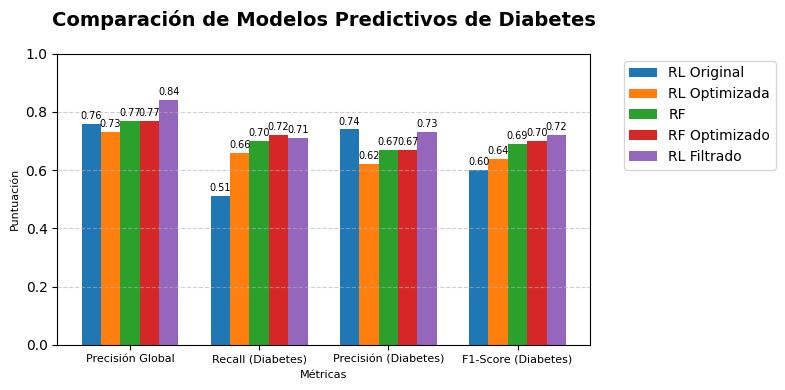

In [61]:
data = {
    'Modelo': ['RL Original', 'RL Optimizada', 'RF', 'RF Optimizado', 'RL Filtrado'],
    'Precisión Global': [0.76, 0.73, 0.77, 0.77, 0.84],
    'Recall (Diabetes)': [0.51, 0.66, 0.70, 0.72, 0.71],
    'Precisión (Diabetes)': [0.74, 0.62, 0.67, 0.67, 0.73],
    'F1-Score (Diabetes)': [0.60, 0.64, 0.69, 0.70, 0.72]
}

df = pd.DataFrame(data)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 4))
metricas = df.columns[1:]  # Todas las columnas excepto 'Modelo'
x = np.arange(len(metricas))
width = 0.15  # Ancho de las barras
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Barras para cada modelo
for i, modelo in enumerate(df['Modelo']):
    valores = df.loc[i, metricas].values
    ax.bar(x + i*width - width*2, valores, width, label=modelo, color=colors[i])

    # etiquetas
    for j, valor in enumerate(valores):
        ax.text(x[j] + i*width - width*2, valor + 0.01, f'{valor:.2f}',
                ha='center', va='bottom', fontsize=7)

ax.set_ylabel('Puntuación', fontsize=8)
ax.set_xlabel('Métricas', fontsize=8)
ax.set_title('Comparación de Modelos Predictivos de Diabetes', pad=20, fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metricas, fontsize=8)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
